In [7]:
import pandas as pandas 
from scipy.sparse import data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
import numpy
from matplotlib import pyplot as plot 


In [10]:

####
# reading the csv data in a dataframe format
# Param to be passed here:
#   ~csv path(must be correct path and the file must be the correct format.)
# ####
def dataframe_head(csv_path):
    dataframe = pandas.read_csv(csv_path)
    dataframe.head()
    
    return [dataframe, dataframe]

#we use pandas in this case.
original_csv_path = "sample_data/credit-scoring-model/public/hmeq.csv"

# print dataframe
dataframe = dataframe_head(original_csv_path)[0]
print(dataframe)


      BAD   LOAN  MORTDUE     VALUE  ...       CLAGE NINQ  CLNO    DEBTINC
0       1   1100  25860.0   39025.0  ...   94.366667  1.0   9.0        NaN
1       1   1300  70053.0   68400.0  ...  121.833333  0.0  14.0        NaN
2       1   1500  13500.0   16700.0  ...  149.466667  1.0  10.0        NaN
3       1   1500      NaN       NaN  ...         NaN  NaN   NaN        NaN
4       0   1700  97800.0  112000.0  ...   93.333333  0.0  14.0        NaN
...   ...    ...      ...       ...  ...         ...  ...   ...        ...
5955    0  88900  57264.0   90185.0  ...  221.808718  0.0  16.0  36.112347
5956    0  89000  54576.0   92937.0  ...  208.692070  0.0  15.0  35.859971
5957    0  89200  54045.0   92924.0  ...  212.279697  0.0  15.0  35.556590
5958    0  89800  50370.0   91861.0  ...  213.892709  0.0  16.0  34.340882
5959    0  89900  48811.0   88934.0  ...  219.601002  0.0  16.0  34.571519

[5960 rows x 13 columns]


In [11]:
def explore_data_information(dataframe):
    dataframe_size = dataframe.shape
    data_description = dataframe.describe()
    data_info = dataframe.info()
    dataframe_columns = dataframe.columns
    return [dataframe_size, data_description, data_info, dataframe_columns]

# Data Visuals
data_visuals = explore_data_information(dataframe) 
for data_visual in data_visuals:
    print(data_visual)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
(5960, 13)
               BAD          LOAN  ...         CLNO      DEBTINC
count  5960.000000   5960.000000  ...  5738.000000  4693.000000
mean      0.199497  18607.969799  ...    21.296096    33.779915
std       0.399656  11207.480417  ...    10.138933     8

In [12]:

import matplotlib.pyplot as plot

def variable_distribution_count(dataframe):
    variables_array = ['BAD', 'REASON', 'JOB', 'DEROG',
                       'DELINQ', 'NINQ']
    variable_count_array = []
    for variable in variables_array:
        value_count = dataframe[variable].value_counts()

        variable_count_array.append(value_count)

    return variable_count_array

def variable_diagramatic_visualize(dataframe):
    variables_array = ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
                       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
    for variable in variables_array:
        if variable == 'BAD':
            dataframe['BAD'].value_counts().plot(kind="barh") 
        if variable == 'LOAN':
            dataframe["LOAN"].plot.hist(bins=20, figsize=(15, 7.5)) 
        if variable == 'DEBTINC':
            dataframe["DEBTINC"].plot.hist(bins=20, figsize=(15, 5))
        if variable == 'CLAGE':
            dataframe["CLAGE"].plot.hist(bins=20, figsize=(15, 7.5))
        if variable == 'CLNO':
            dataframe["CLNO"].plot.hist(bins=20, figsize=(15, 5))
        if variable == 'VALUE':
            dataframe["VALUE"].plot.hist(bins=80, figsize=(15, 7.5))
        if variable == 'MORTDUE':
            dataframe["MORTDUE"].plot.hist(bins=40, figsize=(15, 7.5))
        if variable == 'YOJ':
            dataframe["YOJ"].plot.hist(bins=20, figsize=(15, 7.5))


# Variable value count
variable_count_array = variable_distribution_count(dataframe)
for variable_count in variable_count_array:
    print('Ready for variable count!')
    print(variable_count) 

Ready for variable count!
0    4771
1    1189
Name: BAD, dtype: int64
Ready for variable count!
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Ready for variable count!
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
Ready for variable count!
0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64
Ready for variable count!
0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64
Ready for variable count!
0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64


In [13]:

""""
Takes care of null values.
if any null value ? do the magic : return the initial/original dataframe
"""""
def replace_values_and_print_final_dataframe_look(dataframe):
    # 'NaN'
    if dataframe.isnull().values.any():
        dataframe["REASON"].fillna(value="DebtCon", inplace=True)
        dataframe["JOB"].fillna(value="Other", inplace=True)
        dataframe["DEROG"].fillna(value=0, inplace=True)
        dataframe["DELINQ"].fillna(value=0, inplace=True)

        dataframe.fillna(value=dataframe.mean(), inplace=True)
    
        return dataframe
    else:
        return dataframe    


""""
Takes care of feature selection
Does more on making improvement on our model.
Do some corellation with logistic regression algorithm
We shall use Pearson correlation factor pearson in this case.
"""""
def feature_selection(dataframe):
    dataframe.corr(method='pearson') 
    features_sets = ["LOAN", "DEROG", "DELINQ"]
    return [dataframe, features_sets]




# # manipulate dataframe by checking some conditions
imputed_dataframe = replace_values_and_print_final_dataframe_look(dataframe)
print(imputed_dataframe)



      BAD   LOAN     MORTDUE  ...      NINQ       CLNO    DEBTINC
0       1   1100  25860.0000  ...  1.000000   9.000000  33.779915
1       1   1300  70053.0000  ...  0.000000  14.000000  33.779915
2       1   1500  13500.0000  ...  1.000000  10.000000  33.779915
3       1   1500  73760.8172  ...  1.186055  21.296096  33.779915
4       0   1700  97800.0000  ...  0.000000  14.000000  33.779915
...   ...    ...         ...  ...       ...        ...        ...
5955    0  88900  57264.0000  ...  0.000000  16.000000  36.112347
5956    0  89000  54576.0000  ...  0.000000  15.000000  35.859971
5957    0  89200  54045.0000  ...  0.000000  15.000000  35.556590
5958    0  89800  50370.0000  ...  0.000000  16.000000  34.340882
5959    0  89900  48811.0000  ...  0.000000  16.000000  34.571519

[5960 rows x 13 columns]


In [14]:

#### 
# capp off some features
# Create new binary vaiables
# convert the nominal features, JOB & REASON into usable form 
#   and remove them from the data table
# Distort assymetric distribution of the feature YOJ,For that we can apply log of YOJ 
#   but since some of them are 0, we will use log(YOJ+constant)
#   (df["YOJ"] = df["YOJ"].apply(lambda t : np.log(t+1))
# 
# The function returns a new dataframe
# ####
def feature_transform(dataframe):
    dataframe.loc[dataframe["CLAGE"] >= 600, "CLAGE"] = 600
    dataframe.loc[dataframe["VALUE"] >= 400000, "VALUE"] = 400000
    dataframe.loc[dataframe["MORTDUE"] >= 300000, "MORTDUE"] = 300000
    dataframe.loc[dataframe["DEBTINC"] >= 100, "DEBTINC"] = 100

    dataframe["B_DEROG"] = (dataframe["DEROG"] >= 1)*1
    dataframe["B_DELINQ"] = (dataframe["DELINQ"] >= 1)*1

    dataframe["JOB"].unique()

    dataframe["REASON_1"] = (dataframe["REASON"] == "HomeImp")*1
    dataframe["REASON_2"] = (dataframe["REASON"] != "HomeImp")*1
    dataframe["JOB_1"] = (dataframe["JOB"] == "Other")*1
    dataframe["JOB_2"] = (dataframe["JOB"] == "Office")*1
    dataframe["JOB_3"] = (dataframe["JOB"] == "Sales")*1
    dataframe["JOB_4"] = (dataframe["JOB"] == "Mgr")*1
    dataframe["JOB_5"] = (dataframe["JOB"] == "ProfExe")*1
    dataframe["JOB_6"] = (dataframe["JOB"] == "Self")*1
    dataframe.drop(["JOB", "REASON"], axis=1, inplace=True)

    return dataframe


# # data info transformation
transformed_dataframe = feature_transform(imputed_dataframe)
print(transformed_dataframe)

      BAD   LOAN     MORTDUE          VALUE  ...  JOB_3  JOB_4  JOB_5  JOB_6
0       1   1100  25860.0000   39025.000000  ...      0      0      0      0
1       1   1300  70053.0000   68400.000000  ...      0      0      0      0
2       1   1500  13500.0000   16700.000000  ...      0      0      0      0
3       1   1500  73760.8172  101776.048741  ...      0      0      0      0
4       0   1700  97800.0000  112000.000000  ...      0      0      0      0
...   ...    ...         ...            ...  ...    ...    ...    ...    ...
5955    0  88900  57264.0000   90185.000000  ...      0      0      0      0
5956    0  89000  54576.0000   92937.000000  ...      0      0      0      0
5957    0  89200  54045.0000   92924.000000  ...      0      0      0      0
5958    0  89800  50370.0000   91861.000000  ...      0      0      0      0
5959    0  89900  48811.0000   88934.000000  ...      0      0      0      0

[5960 rows x 21 columns]


In [22]:
import numpy
import matplotlib.pyplot as plot

import itertools 

def error_visualize(error_matrix, classes, normalize=False, title='Error matrix', cmap=plot.cm.Blues):
    ####
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.
    #####
    if normalize:
        error_matrix = error_matrix.astype('float') / error_matrix.sum(axis=1)[:, numpy.newaxis]
        print("Normalized Error matrix")
    else:
        print('Error matrix, without normalization')

    print(error_matrix)

    plot.imshow(error_matrix, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = numpy.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = error_matrix.max() / 2.
    for i, j in itertools.product(range(error_matrix.shape[0]), range(error_matrix.shape[1])):
        plot.text(j, i, format(error_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if error_matrix[i, j] > thresh else "black")

    plot.tight_layout()
    plot.ylabel('The True label')
    plot.xlabel('The Predicted label')


In [31]:
def data_split(dataframe):
    # wiping away the features; BAD,JOB,REASON from the inumpyut features set
    # since its common, its nice to do away with them.
    # x_feature_sets = dataframe.drop(columns=["BAD", "JOB", "REASON"]) ##can be used without correlation
    # y_feature_sets = dataframe["BAD"] ##can be used without correlation
    correlated_dataframe = feature_selection(dataframe)[0]
    feature_sets_selected = feature_selection(dataframe)[1]
    
    x_feature_sets = correlated_dataframe[feature_sets_selected] #LOAN
    y_feature_sets = correlated_dataframe['BAD']

    # Spliting the data into test and train sets
    x_training, x_test, y_training, y_test = train_test_split(x_feature_sets, y_feature_sets, test_size=0.33, random_state=1)
    return [x_training, x_test, y_training, y_test]


def threshold_change(dataframe):
    x_train = data_split(dataframe)[0]
    x_test = data_split(dataframe)[1]
    y_train = data_split(dataframe)[2]
    y_test = data_split(dataframe)[3]

    logistic_regression = LogisticRegression()

    logistic_regression.fit(x_train, y_train)
    y_pred_proba = logistic_regression.predict_proba(x_test)

    # The output of a Logistic regression model is a probability. We can select a threshold value. 
    # If the probability is greater than this threshold value, 
    # the event is predicted to happen otherwise it is predicted not to happen. 
    # A confusion or classification matrix compares the actual outcomes to the predicted outcomes(Predicted array)
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    plot.figure(figsize=(15, 15))

    j = 1
    for i in thresholds:
        y_test_predictions_high_recall = y_pred_proba[:, 1] >= i

        plot.subplot(3, 3, j)
        j += 1

        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
        numpy.set_printoptions(precision=2)

        rec1 = recall_score(y_test, y_test_predictions_high_recall)
        acc = 1.0*(cnf_matrix[0, 0]+cnf_matrix[1, 1])/(cnf_matrix[0, 0]+cnf_matrix[1, 0]+cnf_matrix[1, 1]+cnf_matrix[0, 1])
        print("Recall metric in the testing dataset: ", rec1)
        print("Accuracy score for the testing dataset: ", acc)
       
        # Plot non-normalized confusion matrix
        class_names = [0, 1]
        error_visualize(cnf_matrix, classes=class_names, title='Threshold >= %s' % i)
        
    print("")   
    plot.show()

def set_up_model(dataframe):
    x_training = data_split(dataframe)[0]
    x_test = data_split(dataframe)[1]
    y_training = data_split(dataframe)[2]
    y_test = data_split(dataframe)[3]

    logreg_basic = LogisticRegression()

    # Training the basic logistic regression model with training set
    # fit() does the training.
    logreg_basic.fit(x_training, y_training)

    
    # Coef. A regression coefficient describes the size and direction of the 
    # relationship between a predictor and the response variable. 
    # Coefficients are the numbers by which the values of the term are multiplied in a 
    # regression equation.
    # Revise on the Logistic regression equations.
    # https://en.wikipedia.org/wiki/Logistic_regression
    # Printing the coefficients
    print("intercept ")
    print(logreg_basic.intercept_)
    print("")
    print("coefficients ")
    print(logreg_basic.coef_)

    # Predicting the output of the test cases using the algorithm created above
    y_predictions = logreg_basic.predict(x_test)

    print(y_predictions)

    # Validating the algorithm using various Performance metrics 
    print("")
    a1 = accuracy_score(y_test, y_predictions)
    f1 = f1_score(y_test, y_predictions, average="macro")
    p1 = precision_score(y_test, y_predictions, average="macro")
    r1 = recall_score(y_test, y_predictions, average="macro")

    print("accuracy score : ", a1)
    print("f1 score : ", f1)
    print("precision score : ", p1)
    print("recall score : ", r1)

    return [logreg_basic, y_predictions]

def apply_error_matrix_algorithm(dataframe):
    y_test = data_split(dataframe)[3]
    y_predictions = set_up_model(dataframe)[1]

    error_matrix = confusion_matrix(y_test, y_predictions)
    numpy.set_printoptions(precision=2) #Test 

    # Plot non-normalized confusion matrix
    # classes can be said to be the dataframe variables
    plot.figure()
    error_visualize(error_matrix, classes=["BAD", "GOOD"], title='Confusion matrix - Logistic Regression Algorithm')

    plot.show()




intercept 
[-0.23]

coefficients 
[[-8.45e-05  4.86e-01  6.89e-01]]
[1 0 0 ... 0 0 0]

accuracy score :  0.8185053380782918
f1 score :  0.641572302486008
precision score :  0.7367802732056041
recall score :  0.6195741014822506
Error matrix, without normalization
[[1496   65]
 [ 292  114]]


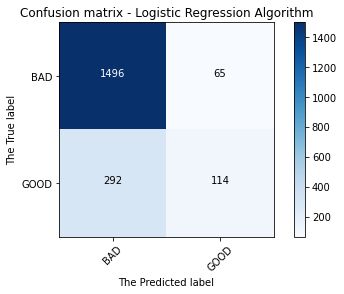

In [32]:
# ####
# #  model setup starts here
# #  Checking the perfomance of our algorithim.
# #  Data split is also done here!
# #  Uncomment this method call after running it. 
# #  To test and compare
# #    on the model performance, Then run the model after threshold changes.
# # ####
apply_error_matrix_algorithm(transformed_dataframe)

Recall metric in the testing dataset:  0.9039408866995073
Accuracy score for the testing dataset:  0.3614641586171835
Error matrix, without normalization
[[ 344 1217]
 [  39  367]]
Recall metric in the testing dataset:  0.729064039408867
Accuracy score for the testing dataset:  0.6110828673106253
Error matrix, without normalization
[[906 655]
 [110 296]]
Recall metric in the testing dataset:  0.5221674876847291
Accuracy score for the testing dataset:  0.7702084392475852
Error matrix, without normalization
[[1303  258]
 [ 194  212]]
Recall metric in the testing dataset:  0.3522167487684729
Accuracy score for the testing dataset:  0.8017285205897305
Error matrix, without normalization
[[1434  127]
 [ 263  143]]
Recall metric in the testing dataset:  0.28078817733990147
Accuracy score for the testing dataset:  0.8185053380782918
Error matrix, without normalization
[[1496   65]
 [ 292  114]]
Recall metric in the testing dataset:  0.21921182266009853
Accuracy score for the testing dataset: 

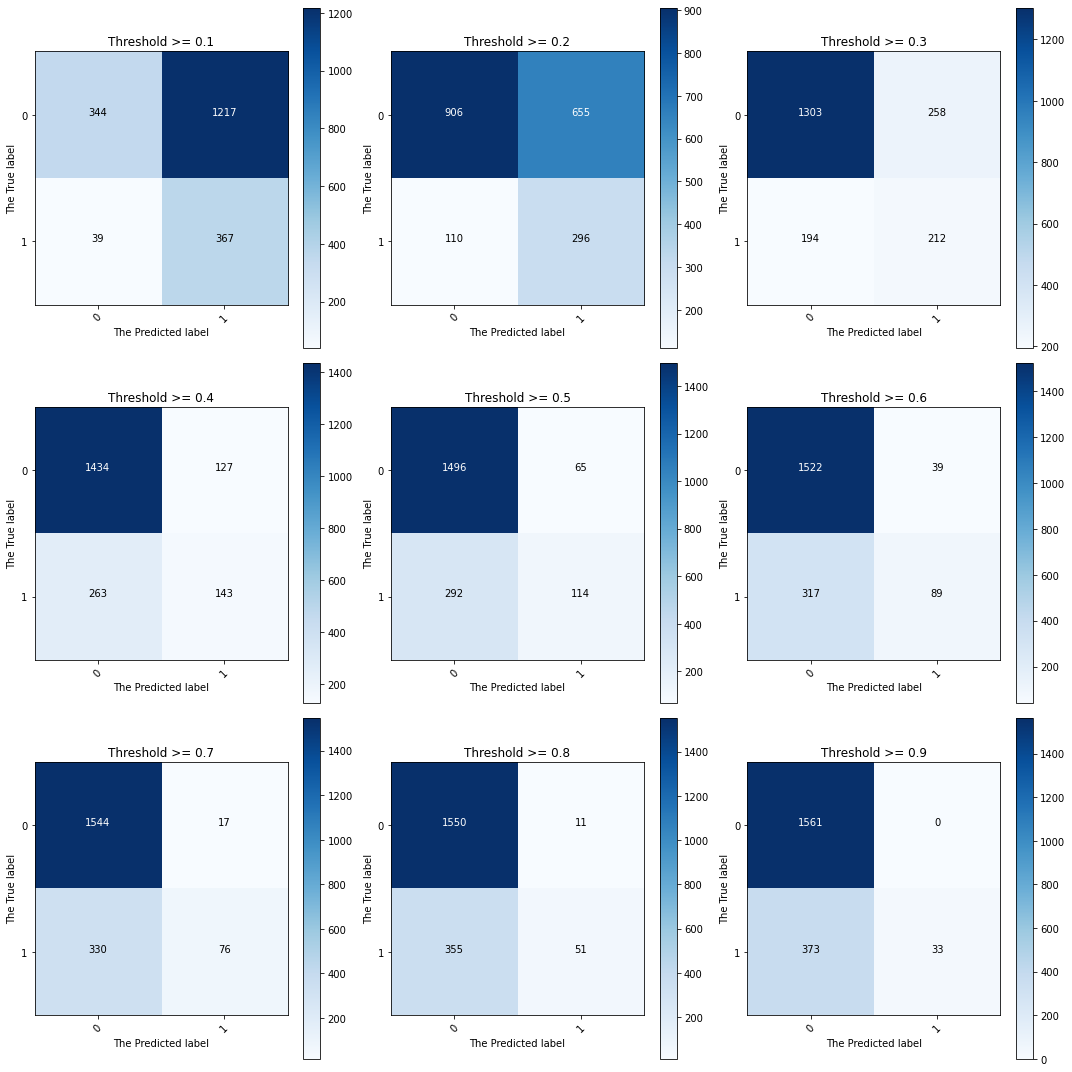

In [33]:

####
# After Threshold change
# Compare the model in this case.
#   The values of recall and accuracy vary with the threshold selected.
#   Wise for the user to choose and decide on the threshold to use 
#       -this is basing your model on the accuracy performaces
#   By default, Threshold is always 0.5 
#       Advisable to use 0.5 as threshold for most cases(general cases)
# ####
threshold_change(transformed_dataframe)

